# InternLM 实战营第二期笔记Class2 笔记

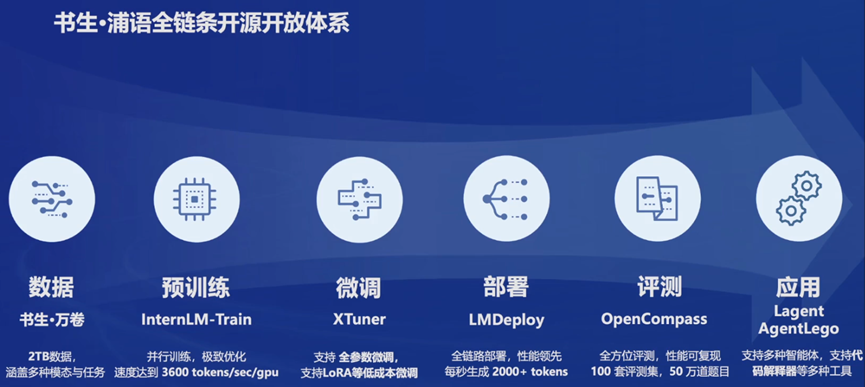

## 1、趣味Demo任务列表

- 部署 `InternLM2-Chat-1.8B` 模型进行智能对话

- 部署实战营优秀作品 八戒-`Chat-1.8B` 模型

- 通过 `InternLM2-Chat-7B` 运行 Lagent 智能体 Demo

- 实践部署 `浦语·灵笔2` 模型

## 2、部署 `InternLM2-Chat-1.8B` 模型进行智能对话

### 2.1 配置环境

进入开发机后，在 `terminal` 中输入环境配置命令 (配置环境时间较长，需耐心等待)：

```
studio-conda -o internlm-base -t demo
# 与 studio-conda 等效的配置方案
# conda create -n demo python==3.10 -y
# conda activate demo
# conda install pytorch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2 pytorch-cuda=11.7 -c pytorch -c nvidia
```
配置完成后，进入到新创建的 conda 环境之中：
```
conda activate demo

输入以下命令，完成环境包的安装：


In [ ]:
pip install huggingface-hub==0.17.3
pip install transformers==4.34 
pip install psutil==5.9.8
pip install accelerate==0.24.1
pip install streamlit==1.32.2 
pip install matplotlib==3.8.3 
pip install modelscope==1.9.5
pip install sentencepiece==0.1.99

### 2.2 下载`InternLM2-Chat-1.8B` 模型

In [ ]:
mkdir -p /root/demo
touch /root/demo/cli_demo.py
touch /root/demo/download_mini.py
cd /root/demo

在`/root/demo/download_mini.py`文件中，复制以下代码

In [ ]:
import os
from modelscope.hub.snapshot_download import snapshot_download

# 创建保存模型目录
os.system("mkdir /root/models")

# save_dir是模型保存到本地的目录
save_dir="/root/models"

snapshot_download("Shanghai_AI_Laboratory/internlm2-chat-1_8b", 
                  cache_dir=save_dir, 
                  revision='v1.1.0')

执行命令，下载模型参数文件：

In [ ]:
python /root/demo/download_mini.py

### 2.3 运行 cli_demo

双击打开 `/root/demo/cli_demo.py` 文件，复制以下代码：

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM


model_name_or_path = "/root/models/Shanghai_AI_Laboratory/internlm2-chat-1_8b"

tokenizer = AutoTokenizer.from_pretrained(model_name_or_path, trust_remote_code=True, device_map='cuda:0')
model = AutoModelForCausalLM.from_pretrained(model_name_or_path, trust_remote_code=True, torch_dtype=torch.bfloat16, device_map='cuda:0')
model = model.eval()

system_prompt = """You are an AI assistant whose name is InternLM (书生·浦语).
- InternLM (书生·浦语) is a conversational language model that is developed by Shanghai AI Laboratory (上海人工智能实验室). It is designed to be helpful, honest, and harmless.
- InternLM (书生·浦语) can understand and communicate fluently in the language chosen by the user such as English and 中文.
"""

messages = [(system_prompt, '')]

print("=============Welcome to InternLM chatbot, type 'exit' to exit.=============")

while True:
    input_text = input("\nUser  >>> ")
    input_text = input_text.replace(' ', '')
    if input_text == "exit":
        break

    length = 0
    for response, _ in model.stream_chat(tokenizer, input_text, messages):
        if response is not None:
            print(response[length:], flush=True, end="")
            length = len(response)


输入命令，执行 Demo 程序：

In [ ]:
conda activate demo
python /root/demo/cli_demo.py

## 3、 使用 Lagent 运行 InternLM2-Chat-7B 模型

### 3.1 初步介绍 Lagent 相关知识

Lagent 是一个轻量级、开源的基于大语言模型的智能体（agent）框架，支持用户快速地将一个大语言模型转变为多种类型的智能体，并提供了一些典型工具为大语言模型赋能。它的整个框架图如下:

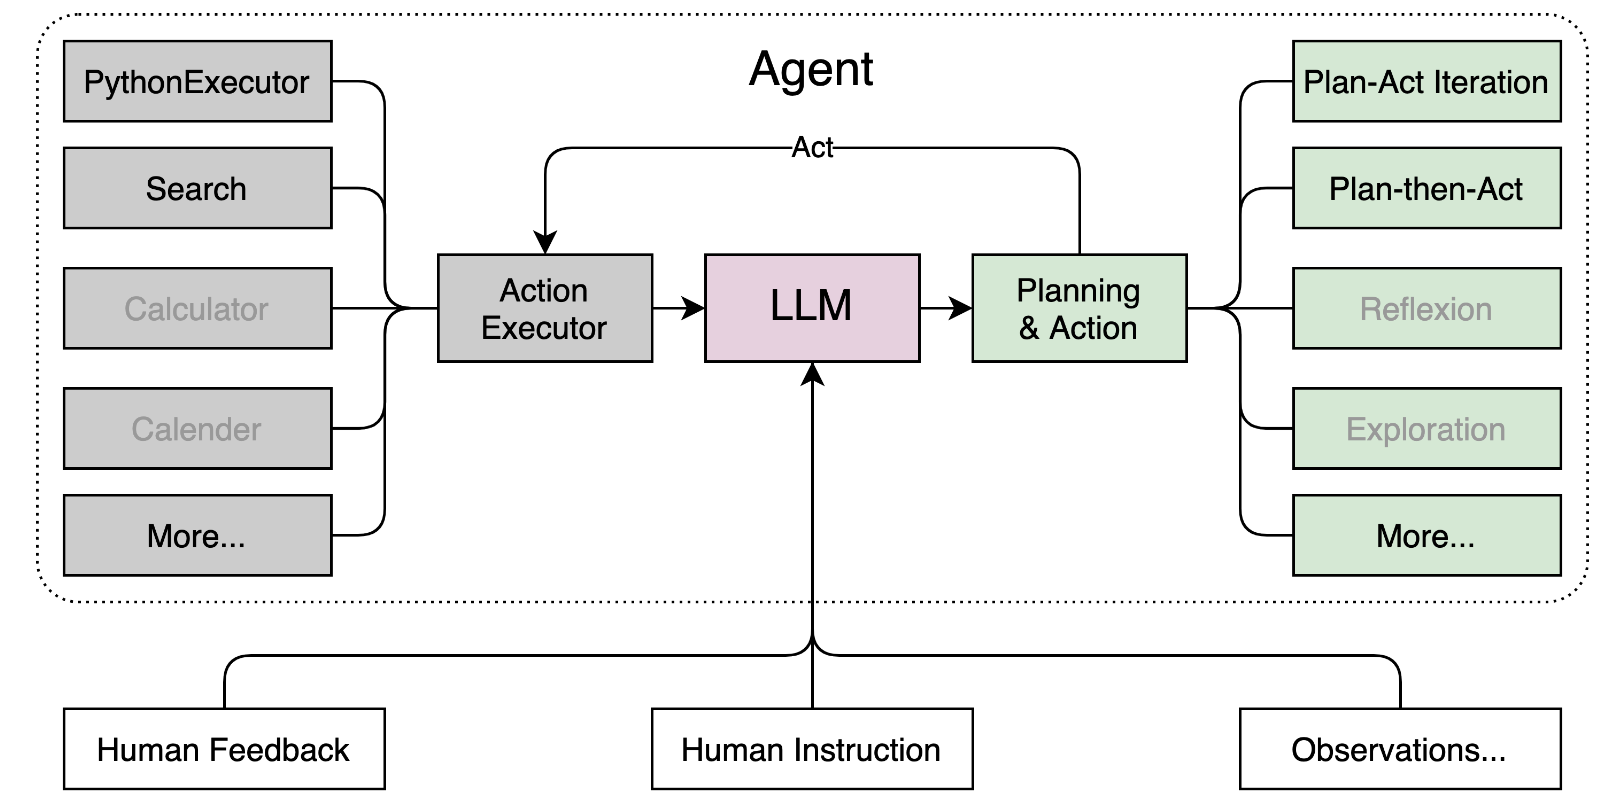

Lagent 的特性总结如下：

- 流式输出：提供 stream_chat 接口作流式输出，本地就能演示酷炫的流式 Demo。
- 接口统一，设计全面升级，提升拓展性，包括：
- Model : 不论是 OpenAI API, Transformers 还是推理加速框架 LMDeploy 一网打尽，模型切换可以游刃有余；
- Action: 简单的继承和装饰，即可打造自己个人的工具集，不论 InternLM 还是 GPT 均可适配；
- Agent：与 Model 的输入接口保持一致，模型到智能体的蜕变只需一步，便捷各种 agent 的探索实现；
- 文档全面升级，API 文档全覆盖。

### 3.2 配置环境

In [ ]:

conda activate demo
# 打开文件子路径
cd /root/demo

# 使用 git 命令下载 Lagent 相关的代码库：
git clone https://gitee.com/internlm/lagent.git
# git clone https://github.com/internlm/lagent.git
cd /root/demo/lagent
git checkout 581d9fb8987a5d9b72bb9ebd37a95efd47d479ac
pip install -e . # 源码安装



### 3.3 使用 Lagent 运行 InternLM2-Chat-7B 模型为内核的智能体

Intern Studio 在 share 文件中预留了实践章节所需要的所有基础模型，包括 InternLM2-Chat-7b 、InternLM2-Chat-1.8b 等等。

我们可以在后期任务中使用 share 文档中包含的资源，但是在本章节，为了能让大家了解各类平台使用方法，还是推荐同学们按照提示步骤进行实验。

In [ ]:
# 打开 lagent 路径：
cd /root/demo/lagent

# 在 terminal 中输入指令，构造软链接快捷访问方式：
ln -s /root/share/new_models/Shanghai_AI_Laboratory/internlm2-chat-7b /root/models/internlm2-chat-7b

# 打开 /demo/lagent 路径下 examples/internlm2_agent_web_demo_hf.py 文件，并修改对应位置 (71行左右) 代码：
# 其他代码...
value='/root/models/internlm2-chat-7b'
# 其他代码...

In [ ]:
# 输入运行命令 - 点开 6006 链接后，大约需要 5 分钟完成模型加载：
streamlit run /root/demo/lagent/examples/internlm2_agent_web_demo_hf.py --server.address 127.0.0.1 --server.port 6006

参考链接：https://github.com/InternLM/Tutorial/blob/camp2/helloworld/hello_world.md